In [1]:
import quairkit as qkit
from quairkit import Circuit
from quairkit.qinfo import *
from quairkit.database import *
import numpy as np
import torch

qkit.set_dtype('complex128')

In [2]:
o_nz = torch.tensor([[-1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]], dtype=torch.complex128)

ft3 = torch.tensor([[0, 1, 1, 1],
                    [1, 0, 1, -1],
                    [1, -1, 0, 1],
                    [1, 1, -1, 0]], dtype=torch.complex128) / np.sqrt(3)

proj_zero = torch.kron(zero_state(3).bra, torch.eye(2 ** 1))

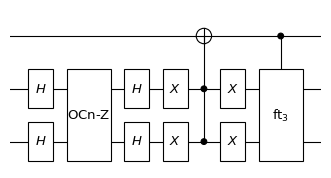

In [3]:
cir = Circuit(3)
cir.h([1, 2])
cir.oracle(o_nz, [1, 2], latex_name=r'$\text{OCn-Z}$')
cir.h([1, 2])

cir.x([1, 2])
cir.ccx([2, 1, 0])
cir.x([1, 2])

cir.control_oracle(ft3, qubits_idx=[0, 1, 2], latex_name=r'$\text{ft}_3$')
cir.plot()

G2 = cir.unitary_matrix()
    

In [4]:
Uin = random_unitary(1)

In [5]:
cir = Circuit(4)

cir.h([1, 2])

for i in range(5):
    cir.cx([2, 3])
    cir.cy([1, 3])
    cir.oracle(Uin, [3], latex_name=r'$U_{\text{in}}$')
    cir.cy([1, 3])
    cir.cx([2, 3])
    
    if i == 2:
        cir.oracle(o_nz, [1, 2], latex_name=r'$\text{OCn-Z}$')
    
    if i in [0, 2]:
        cir.oracle(G2, qubits_idx=[0, 1, 2], latex_name=r'$G_2$')
        cir.x([0])
        
    elif i in [1, 3]:
        cir.oracle(G2.conj().T, qubits_idx=[0, 1, 2], latex_name=r'$G_2^\dagger$')

cir.h([1, 2])

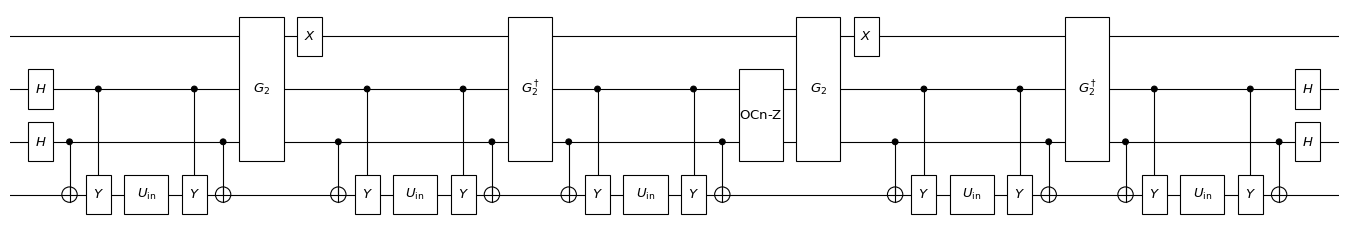

In [6]:
cir.plot()

In [7]:
rho = random_state(1)
input_state = qkit.to_state(torch.kron(zero_state(3).density_matrix, rho.density_matrix))
output_state = cir(input_state)

traced_state = proj_zero @ output_state.density_matrix @ dagger(proj_zero)
print('The probability of the output state of all ancilla qubits being |000> is', traced_state.trace().item())

state_fidelity(dagger(Uin) @ rho.density_matrix @ Uin, traced_state).item()

The probability of the output state of all ancilla qubits being |000> is (1.0000000000000038+2.818925648462312e-17j)


1.000000000000002

In [8]:
qkit.print_info()


---------VERSION---------
quairkit: 0.2.0
torch: 2.5.1+cu124
torch cuda: 12.4
numpy: 1.26.4
scipy: 1.14.1
matplotlib: 3.9.3
---------SYSTEM---------
Python version: 3.10.15
OS: Linux
OS version: #1 SMP Tue Nov 5 00:21:55 UTC 2024
---------DEVICE---------
CPU:  13th Gen Intel(R) Core(TM) i9-13980HX
GPU: (0) NVIDIA GeForce RTX 4090 Laptop GPU
